# Data Science Nigeria X Microsoft 2024 AI Bootcamp Qualification Hackathon
## Heart Disease prediction for the DSN AI Bootcamp 2024
The challenge at hand revolves around the creation of a sophisticated predictive model aimed at determining the likelihood of an individual having heart disease. As one of the leading causes of global mortality, detecting heart disease in its early stages is pivotal for enhancing patient outcomes and halting its progression. The conventional diagnostic methods often come with substantial costs and time requirements. Thus, there exists a pressing need for a cutting-edge predictive model that can evaluate the risk of heart disease utilizing easily accessible patient information.

The objective of this challenge is to design and build a predictive model capable of accurately determining the probability of an individual having heart disease. The focus is on leveraging machine learning techniques to create a model that can analyze relevant features and provide reliable predictions. The model should demonstrate high accuracy and generalizability, ensuring its effectiveness on new, unseen data.

Solving this challenge holds great significance. Early prediction aids in timely intervention and prevention, optimizing healthcare resources. The cost-effectiveness of predictive models reduces unnecessary procedures, benefiting patients and healthcare systems. Targeted public health efforts can stem from aggregated data, and research also advances through model insights. Ultimately, this challenge addresses a crucial healthcare issue using advanced machine learning, promising improved interventions and better health outcomes.

In [3]:
#import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#import evaluation metrics
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DSN_Hackathon/data/Train Dataset .csv')

In [5]:
data.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [6]:
data.shape

(7303, 15)

In [7]:
data.describe()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [9]:
data.isna().sum()

,0
Id,0
Age,0
Sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0


In [10]:
data.target.value_counts()

,count
target,
1,5941
0,1362


In [11]:
data[['Sex','target']].value_counts()

Sex  target
1    1         3012
0    1         2929
     0          725
1    0          637
Name: count, dtype: int64

In [12]:
#same output as previous
pd.crosstab(data['target'], data['Sex'])

Sex,0,1
target,,
0,725,637
1,2929,3012


In [13]:
data.corr()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Id,1.000000,-0.007837,0.002818,-0.018952,-0.016580,0.015200,-0.023790,0.001488,-0.012959,0.001735,0.004434,0.000617,0.033008,-0.000420,0.006148
Age,-0.007837,1.000000,0.002335,-0.001771,-0.022767,0.004541,0.012960,-0.002644,0.000204,0.001495,0.007193,-0.004480,0.013257,0.002313,-0.002846
Sex,0.002818,0.002335,1.000000,-0.030134,0.002793,-0.007434,-0.017675,-0.003850,-0.006331,0.027802,-0.004897,0.000663,0.010203,0.003261,0.030608
cp,-0.018952,-0.001771,-0.030134,1.000000,0.011924,0.024823,-0.016848,0.001544,0.019503,0.009621,0.000942,-0.009439,0.013676,-0.009296,-0.198082
trestbps,-0.016580,-0.022767,0.002793,0.011924,1.000000,-0.003238,0.003757,0.010334,0.001575,0.021449,0.011277,0.001750,-0.009947,0.005632,0.009320
chol,0.015200,0.004541,-0.007434,0.024823,-0.003238,1.000000,0.006588,0.003218,-0.014182,-0.006674,-0.003930,-0.013061,0.007788,0.011114,-0.012291
fbs,-0.023790,0.012960,-0.017675,-0.016848,0.003757,0.006588,1.000000,-0.002298,0.005419,0.010908,0.004803,0.000191,0.001255,-0.006554,0.003925
restecg,0.001488,-0.002644,-0.003850,0.001544,0.010334,0.003218,-0.002298,1.000000,-0.004714,-0.000270,0.017644,0.015365,0.003593,-0.007497,0.005911
thalach,-0.012959,0.000204,-0.006331,0.019503,0.001575,-0.014182,0.005419,-0.004714,1.000000,0.019037,0.012347,-0.010617,0.004899,0.007943,-0.004634
exang,0.001735,0.001495,0.027802,0.009621,0.021449,-0.006674,0.010908,-0.000270,0.019037,1.000000,0.018074,0.005094,-0.012028,0.010875,0.481897


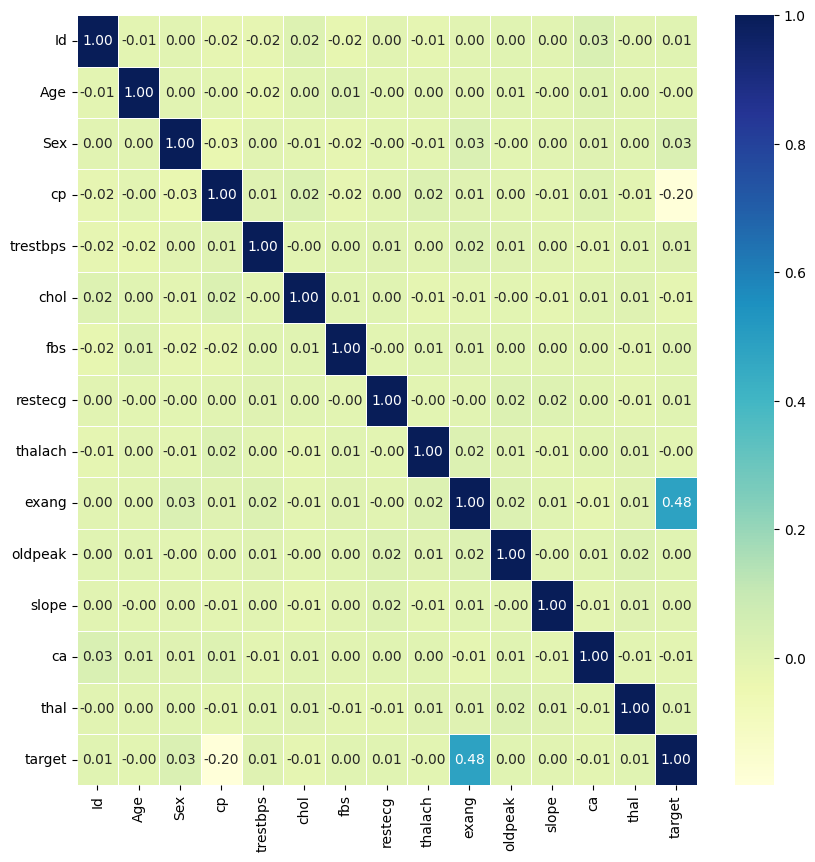

In [14]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sns.heatmap(data.corr(),
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [15]:
#splitting the data into features and target
X = data.drop(['target'], axis=1)
y = data['target']

In [16]:
X

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,19401,30,1,2,107,177,1,2,119,0,2.7,1,0,0
7299,10446,42,1,2,96,551,1,2,76,0,1.9,2,3,2
7300,13219,51,1,0,151,165,1,0,190,1,0.9,0,0,2
7301,15349,29,0,0,195,287,1,2,161,1,3.4,1,1,0


In [17]:
y

,target
0,1
1,0
2,1
3,1
4,1
...,...
7298,0
7299,1
7300,1
7301,1


In [18]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5842, 14), (1461, 14), (5842,), (1461,))

In [20]:
#instantiating and fitting our models
models = {'LogisticRegression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'RandomForest': RandomForestClassifier()}

#creating a function to fit the models
scores = {}
def fit_models(models, X_train, X_test, y_train, y_test):
  for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + 'trained')
    scores[name] = model.score(X_test, y_test)
  return scores

In [21]:
fit_models(models, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegressiontrained
KNNtrained
RandomForesttrained


{'LogisticRegression': 0.8268309377138946,
 'KNN': 0.7885010266940452,
 'RandomForest': 0.810403832991102}

In [22]:
models_scores = fit_models(models,  X_train, X_test, y_train, y_test)
model_compare = pd.DataFrame(models_scores, index=['accuracy'])
model_compare

LogisticRegressiontrained
KNNtrained


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForesttrained


,LogisticRegression,KNN,RandomForest
accuracy,0.826831,0.788501,0.820671


## HYPERPARAMETER TUNING

In [23]:
# NOW WE TUNE THE TOP TWO MODELS USING RANDOMIZED SEARCH CV
grid_lr = {'C': np.logspace(-4, 4, 20),
          'solver': ['liblinear']}

grid_rf = {'n_estimators': np.linspace(100, 1000, 10, dtype=int),
          'max_depth': [None, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [24]:
np.random.seed(42)
rsc_lr = RandomizedSearchCV(LogisticRegression(),
                           param_distributions=grid_lr,
                           cv=5,
                           n_iter=50,
                           verbose=True)

rsc_lr.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [25]:
rsc_lr.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [26]:
rsc_lr.score(X_test, y_test)

0.8247775496235455

In [27]:
rsc_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=grid_rf,
                           cv=5,
                           n_iter=50,
                           verbose=True)

rsc_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
                   verbose=True)

In [28]:
rsc_rf.best_params_

{'n_estimators': 800,
 'min_samples_split': 18,
 'min_samples_leaf': 17,
 'max_depth': None}

In [29]:
rsc_rf.score(X_test, y_test)

0.8145106091718002

In [30]:
#using grid search cv to tune the best model
gs_lr = GridSearchCV(LogisticRegression(),
                           param_grid=grid_lr,
                           cv=5,
                           verbose=True)

gs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [31]:
gs_lr.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [32]:
gs_lr.score(X_test, y_test)

0.8247775496235455

In [33]:
# USING THE BEST PARAMETERS
ideal_model = LogisticRegression(C=0.08858667904100823,
                                 solver='liblinear')
ideal_model.fit(X_train, y_train)

LogisticRegression(C=0.08858667904100823, solver='liblinear')

In [34]:
ideal_model.score(X_test, y_test)

0.8247775496235455

In [35]:
data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DSN_Hackathon/data/Test Dataset.csv')

In [36]:
data_test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [37]:
data.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [38]:
data_test.columns = data_test.columns.str.capitalize()

In [39]:
data_test.head()

,Id,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [40]:
data.columns

Index(['Id', 'Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [41]:
data_test.columns = X_train.columns

In [42]:
data_test.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [43]:
test_preds = ideal_model.predict(data_test)

In [44]:
test_preds

array([1, 1, 1, ..., 1, 1, 0])

In [45]:
df_preds = pd.DataFrame()
df_preds['ID'] = data_test['Id']
df_preds['Target'] = test_preds

In [46]:
df_preds.head()

,ID,Target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,0


In [47]:
df_preds.to_csv('submission.csv', index=False)